# NLP Applications for Text Mining

In this notebook will be showed how to use NLP techniques with Python tools for several examples, following this list:

- Part of Speech Tagging (POS)
- Named Entity Recognition (NER)




### Part of Speech Tagging

Part of Speech Tagging (POS) is the process of identifying the part to which a word belongs in a sentence of a corpus, for instance, if it is a verb, subject or a pronoun. We will use the Spacy framework to show you examples of its usage.

In [129]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I perform the tagging of words")
displacy.render(doc, style="dep", jupyter=True)

In [130]:
options = {"fine_grained":True, "distance":100, "color":"#2C9CD8"}
displacy.render(doc, style="dep", jupyter=True, options=options)

### Named Entity Recognition (NER)



In [131]:
text = """GOOGLE has developed a new algorithm to surpass IBM. John Bugoiggy is responsible for developing this strategy, which is believed to be the best of the 21st century."""
doc = nlp(text)
sentence_spans = list(doc.sents)
displacy.render(sentence_spans, style="ent", jupyter=True)

## Text Summarization

Techniques for text summarization are divided into a) ***abstractive
based*** and b) ***extractive based***. Method **a** requires the usage
of a more complex process, involving the inference of word and sentence
relationships and developing a sentence generator based on the syntactic
relationships found. This strategy is supervised and is computationally
expensive. In the other end, method **b** is unsupervised and provides a
summarization of text by means of ranking the importance of sentences.
This importance level is calculated with similarity measures from
token/word frequency matrices, such as *BoW* or *TFIDF*. The steps for extractive methods are (1) Compute a normalized term frequency matrix and the total frequency of words in the document; (2) compute the sentence relevance by means of similarity measures or by calculating the sum of the word normalized frequencies that belong to each sentence and (3) sort the sentence by importance level. The summary of the document is then the set of more important sentences.


![Caption](../Figures/TextSummarize.PNG)

#### Text Summarization with Gensim
(Example taken from: [George Pipis](https://python-bloggers.com/2020/09/text-summarization-in-python-with-gensim/))

In [148]:
from gensim.summarization.summarizer import summarize
from gensim.summarization.textcleaner import split_sentences

text = """The Latent Dirichlet Allocation approach is an unsupervised method used for Topic Modelling that is supported in two main considerations: (1) Documents that have similar words must have similar topics; (2) Documents that have groups of words frequently occurring together usually have the same topic. LDA is a fuzzy clustering method that provides a value that reflects the membership of the sentence into a specific topic. The clustering process is performed based on the adequacy of a sentence to a generated corpus. 
The LDA process generates documents based on a probability modulated by the number of topics and words present in documents. This probability has the following equation:
In the first case, the Dirichlet distribution evaluates the probability of a document belonging to a specific Topic, while the second evaluates the probability of a topic being associated with a word. The triangles can help visualize these distributions. The blue triangle has topics as edges, while documents as elements. The closer the words are from the edges, the closer these are related to that topic. In the other hand, the yellow tetrahedron has words as edges, while topics as elements. The $\theta$ and $\phi$ parameters are associated with multinomial distributions corresponding to topics and words, respectively. From these distributions, words and topics are generated and combined to generate a document. The documents are generated based on the arrangement between document-topics probabilities and topic-words probabilities. The generated document that maximizes the probability and best fit the inputted document will be classified based on the arrangement, and be assigned a membership probability to each topic.
The LDA typically accepts a \textit{BoW} model, from which it derives the topics to which documents are associated based on the words that these contain. \textbf{Examples of applying LDA can be seen in the following \textit{notebook}}."""

test_summary = summarize(text, ratio=0.15, split=True)

print(test_summary)

['The LDA process generates documents based on a probability modulated by the number of topics and words present in documents.', 'The LDA typically accepts a \textit{BoW} model, from which it derives the topics to which documents are associated based on the words that these contain.']


#### Text Summarization with Spacy
(Example taken from [Jesse E. Agbe](https://github.com/Jcharis/Natural-Language-Processing-Tutorials/blob/master/NLP_with_SpaCy/Text%20Summarization%20In%20SpaCy.ipynb))

In [184]:
import numpy as np


nlp = spacy.load("en_core_web_sm")
# Build an NLP Object
docx = nlp(text)
# Tokenization of Text
mytokens = [token.text for token in docx]
#Word Frequency table
# Build Word Frequency
# word.text is tokenization in spacy
word_frequencies = {}
for word in docx:
        if word.text not in word_frequencies.keys():
            word_frequencies[word.text] = 1
        else:
            word_frequencies[word.text] += 1

#Normalize 
maximum_frequency = max(word_frequencies.values())

for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequency)

        #sentence list
sentence_list = [ sentence for sentence in docx.sents ]
[w.text.lower() for t in sentence_list for w in t ]

#ranking sentences:
sentence_scores = {}  
for sent in sentence_list:  
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if len(sent.text.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word.text.lower()]
                    else:
                        sentence_scores[sent] += word_frequencies[word.text.lower()]

sorted_sentences = [sentence[0] for sentence in sorted(sentence_scores.items(), key=lambda value: value[1])[::-1]]

#Only print the first 3 sentences
final_sentences = [ w.text for w in sorted_sentences[:3]]
summary = ' '.join(final_sentences)
print(summary)

The generated document that maximizes the probability and best fit the inputted document will be classified based on the arrangement, and be assigned a membership probability to each topic. The LDA typically accepts a 	extit{BoW} model, from which it derives the topics to which documents are associated based on the words that these contain. The closer the words are from the edges, the closer these are related to that topic.


## Topic Modelling

Classification of text documents is a very common task in NLP. The purpose is to assign classes to documents based on their content. Examples of this type of problem are seen in many of our daily tasks. For instance, web search engines use topic modelling to assign the best documents based on the queries inputted, or systems that provide content-based recommendations, such as streaming services, use topic modelling to match the best content to your content history. All these tasks are related to document classification.

![Caption](Figures/TopicModelling.PNG)


The process to compute document classification is presented in the figure and involves using one of the *Text Processing* methods discussed in the previous section with a *BoW* or *TFIDF* matrix. These methods are *LSI*, *LDA* and *NMF*. The result depends on the method used, but typically we are able to have the main topics and keywords that describe the content of each document, and finally, based on the topics extracted, classify the document as being majorly associated with a specific topic. 

In this example, we will use sklearn and gensim to test several topic modelling strategies. We will use 2 datasets (Atheism and Graphics). We will test these with LDA, LSI and NMF.

In [245]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

#Loading a dataset
categories = ['alt.atheism', "comp.graphics"]

from sklearn.datasets import fetch_20newsgroups

train_dataset = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
train_dataset.target_names

['alt.atheism', 'comp.graphics']

In [272]:
#Compute BoW or TFIDF
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(train_dataset.data)

tfidf_vect = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english", max_features=1000)
tfidf_matrix = tfidf_vect.fit_transform(train_dataset.data)

#### Latent Dirichelet Allocation (LDA) with BoW

[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0]


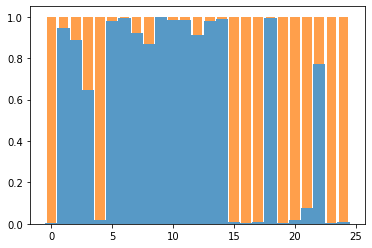

In [249]:
from sklearn.decomposition import LatentDirichletAllocation

#Start LDA transformer
LDA = LatentDirichletAllocation(n_components=2, random_state=42)
LDA.fit(doc_term_matrix)

#fit and transform matrix
topic_values = LDA.transform(doc_term_matrix)
docs = 25
labels = range(docs)

fig, ax = plt.subplots()

ax.bar(labels, topic_values[:docs,0], 1, alpha=0.75)
ax.bar(labels, topic_values[:docs,1], bottom=topic_values[:docs,0], alpha=0.75)
# ax.bar(labels, topic_values[:docs,2], bottom=topic_values[:docs,1], alpha=0.75)
print(train_dataset.target[:docs])

#### Latent Dirichelet Allocation (LDA) with TFIDF

Target Class for Document
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0]


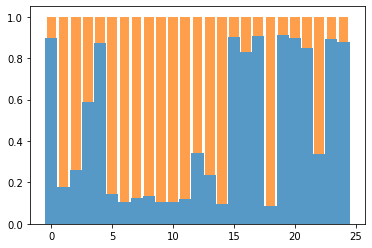

In [276]:
#Start LDA transformer
LDA = LatentDirichletAllocation(n_components=2, random_state=42)
LDA.fit(tfidf_matrix)

#fit and transform matrix
topic_values = LDA.transform(tfidf_matrix)
docs = 25
labels = range(docs)

fig, ax = plt.subplots()

ax.bar(labels, topic_values[:docs,0], 1, alpha=0.75)
ax.bar(labels, topic_values[:docs,1], bottom=topic_values[:docs,0], alpha=0.75)
# ax.bar(labels, topic_values[:docs,2], bottom=topic_values[:docs,1], alpha=0.75)
print("Target Class for Document")
print(train_dataset.target[:docs])

#### Non Negative Matrix Factorization

In [278]:
from sklearn.decomposition import NMF
n_components = 2

nmf = NMF(n_components=n_components, random_state=1,
          beta_loss="kullback-leibler", solver="mu", max_iter=1000, alpha=.1, l1_ratio=.5).fit(tfidf_matrix)

topic_values = nmf.transform(tfidf_matrix)
pred = topic_values.argmax(axis=1)

print("Target:")
print(train_dataset.target[:docs])
print("Predicted:")
print(pred[:docs])

c:\users\biosignals3\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Target:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
Predicted:
[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1]


#### Latent Semantic Indexing

In [279]:
from collections import defaultdict
from gensim import models
from gensim import corpora
import numpy as np
from string import punctuation
from nltk import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

documents = train_dataset.data
eng_stopwords = set(nlp.Defaults.stop_words)

tokenizer = RegexpTokenizer(r'\s+', gaps=True)
stemmer = PorterStemmer()
translate_tab = {ord(p): u" " for p in punctuation}

def text2tokens(raw_text):
    """Split the raw_text string into a list of stemmed tokens."""
    clean_text = raw_text.lower().translate(translate_tab)
    tokens = [token.strip() for token in tokenizer.tokenize(clean_text)]
    tokens = [token for token in tokens if token not in eng_stopwords]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return [token for token in stemmed_tokens if len(token) > 2]  # skip short tokens


dataset = [text2tokens(txt) for txt in documents]  # convert a documents to list of tokens

dictionary = corpora.Dictionary(dataset)
print(dictionary)
corpus = [dictionary.doc2bow(text) for text in dataset]

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model
corpus_tfidf = tfidf[corpus]
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=300)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf] 

# From the lsi_model we get new vectors
from gensim import similarities
index = similarities.MatrixSimilarity(corpus_lsi)
self_sims = index[corpus_lsi]

#From LSI we converted the TFIDF to LSI vector space. Now, to get the classification, we should cluster the similarity matrix
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(self_sims)
pred = kmeans.labels_

print("Targeted:")
print(train_dataset.target[:25])
print("Predicted:")
print(pred[:25])

Dictionary(15313 unique tokens: ['125245', '12872', '1993apr15', '1qie61', '2000']...)
Targeted:
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
Predicted:
[0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0]


### Main Conclusion

- LDA works better than the remaining methods
- NMF did not perform well
- LSI works well based on the distance of vectors

- LDA works better with BoW
- LSI works better with TFIDF

## Sentiment Analysis

The analysis of sentiment in text corresponds to identifying which type of emotion is provided in the text content, typically separated in two main classes: positive and negative sentiment. This analysis is very common nowadays, specially in the context of online reviews, comments on social networks, etc... In order to apply this analysis in text, we can use pre-trained models from **textblob** or train a classifier with pre-labelled data. This notebook will show these two ways of making Sentiment Analysis. The examples were taken from: 
- https://kgptalkie.com/amazon-and-imdb-review-sentiment-classification-using-spacy/
- https://stackabuse.com/sentiment-analysis-in-python-with-textblob/

![Caption](Figures\SentimentAnalysis.PNG)

The process involves (1) pre-processing the textual data and (2) training a classifier with labelled data. The pre-processing step includes the cleaning of text, by removing and adjusting words to a format that promotes better classification, namely by removing stop-words, lemmatizing and, in additionally to the typical pre-processing tasks, use only words associated with emotions, such as verbs and adjectives. This step can be made with a *POS* pre-trained model. From the extracted tokens, create a *BoW* or *TFIDF* matrix, by sentence or paragraph. Each sentence will be associated with a specific sentiment class. The model can then be trained with the *BoW* or *TFIDF* matrix, and used afterwards to classify new sentences and documents.

In [55]:
# Importing TextBlob
from textblob import TextBlob
import pandas as pd

# Preparing an input sentence
sentence = '''The platform provides universal access to the world's best education, partnering with top universities and organizations to offer courses online.'''

# Creating a textblob object and assigning the sentiment property
analysis = TextBlob(sentence).sentiment
print(analysis)

Sentiment(polarity=0.5, subjectivity=0.26666666666666666)


In [56]:
#Load IMDB data
columns_name = ['Review', 'Sentiment']
data_imdb = pd.read_csv('Data/imdb_labelled.txt', sep = '\t', header = None)
data_imdb.columns = columns_name
data_imdb.head()

Review  Sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1

In [70]:
pred = []
for sentence in data_imdb.values:
    pol = TextBlob(sentence[0]).sentiment.polarity
    if(pol>0.1):
        pred.append(1)
    else:
        pred.append(0)


print(accuracy_score(data_imdb["Sentiment"].values, pred))
print(classification_report(data_imdb["Sentiment"].values, pred))

0.7647058823529411
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       362
           1       0.81      0.72      0.76       386

    accuracy                           0.76       748
   macro avg       0.77      0.77      0.76       748
weighted avg       0.77      0.76      0.76       748



As can be seen, using textblob sentiment analyzer makes sense and is able to correctly classify the reviews as positive or negative. The process to build such classifiers requires several steps, namely:

- 1 - Pre-Process:
    - Tokenize
- 2 - Feature Extraction:
    - TFIDF model
- 3 - Train-Test
- 4 - Classify

In [90]:
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import spacy

from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)

punct = string.punctuation

def text_data_cleaning(sentence):
    doc = nlp(sentence)
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

def text_data_cleaning2(sentence):
    doc = nlp(sentence)
    tokens = []
    for token in doc:
        if token.pos_ in ["AUX", "ADJ", "NOUN"]:
            temp = token.lemma_.lower().strip()
            tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

vectorizer = TfidfVectorizer(stop_words="english", max_features=1000, tokenizer=text_data_cleaning2)

cls = MultinomialNB()

In [91]:
X = data_imdb["Review"]
y = data_imdb["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)

cls.fit(X_train_vectorized, y_train)

y_pred = cls.predict(vectorizer.transform(X_test))

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\users\biosignals3\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7666666666666667
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        76
           1       0.72      0.85      0.78        74

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.78      0.77      0.77       150



## Text Generation

### Using Markovify (Markov Chains)

In [2]:
import markovify

corpus = open(r"..\Data\shakespear.txt").read()
txt_model = markovify.Text(corpus)

for i in range(5):
    print(txt_model.make_sentence())


However, when our turn came the occasional cry of surprise, threw up my mind to run short, and I concealed a piece of white satin shoes and a pair of glasses on his overcoat.
Holmes grinned at the bell-pull.
Briefly, Watson, I am boasting when I coupled it with all the facts should now come to the agency and inquire whether the present moment, as far as the old man at my surprise, the three missing stones.
Any injury to it as the most part with poor ignorant folk who know little of the day before, all carefully dried and collected on the table he drew the drawer open.
Who were these German people, and what were we going, and what was about to renew her entreaties when a sudden turn to rain, with high collar, black frock-coat, white waistcoat, yellow gloves, patent-leather shoes, and light-coloured gaiters.


### Using Xereg or Exrex

In [35]:
from xeger import Xeger

a = Xeger(limit=10)

#print 5 different 
for i in range(5):
    print(a.xeger("p+n+z?"))

print("\n")

pattern = "[a-z]{5,15}@(gmail|hotmail|fct\.unl)\.(com|pt)"
#generating 5 different emails
for i in range(5):
    print(a.xeger(pattern))

print("\n")
    
import exrex
for i in range(5):
    print(exrex.getone(pattern))

pppppnn
ppppppppnnz
ppppppppnnn
pppppppppnnnnz
pnnnnnnn


zrynwgmps@fct.unl.com
npbkada@hotmail.com
glqaqssu@hotmail.pt
hgjsb@gmail.com
yiimxqbhct@gmail.com


jkoyvpwffn@gmail.com
wzwqdy@fct.unl.pt
sjmcgzdxllxhtea@gmail.pt
rafhbixnnownzd@hotmail.pt
ozcpc@gmail.com


## Transformers

In this example we will provide a simple example taken from "https://github.com/huggingface/blog/tree/master/notebooks" to show how to use Transformers for Tokenization and AutoCompletion tasks. Other examples are available here: https://github.com/huggingface/transformers/tree/master/examples and https://github.com/huggingface/transformers/tree/master/notebooks

In [10]:
from transformers import AutoTokenizer, AutoModel

MODEL_NAME = "bert-base-cased"

model = AutoModel.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

tokens_pt = tokenizer("This is an input example", return_tensors="pt")
for key, value in tokens_pt.items():
    print("{}:\n\t{}".format(key, value))
    
single_seg_input = tokenizer("I am very disappointed. This method is quite expensive to perform tokenization.")
print("Single segment token (str): {}".format(tokenizer.convert_ids_to_tokens(single_seg_input['input_ids'])))

input_ids:
	tensor([[ 101, 1188, 1110, 1126, 7758, 1859,  102]])
token_type_ids:
	tensor([[0, 0, 0, 0, 0, 0, 0]])
attention_mask:
	tensor([[1, 1, 1, 1, 1, 1, 1]])
Single segment token (str): ['[CLS]', 'I', 'am', 'very', 'disappointed', '.', 'This', 'method', 'is', 'quite', 'expensive', 'to', 'perform', 'token', '##ization', '.', '[SEP]']


In [83]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

# encode context the generation is conditioned on
input_ids = tokenizer.encode('I have been robbed. I should call', return_tensors='pt')

# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=10)

print("Input:\n"+ 100 * '-')
print("I have been robbed. I should call")
print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Input:
----------------------------------------------------------------------------------------------------
I have been robbed. I should call
Output:
----------------------------------------------------------------------------------------------------
I have been robbed. I should call the police


# References

#### POS and NER

- https://spacy.io/usage/rule-based-matching#dependencymatcher

#### Text Summarization
- https://python-bloggers.com/2020/09/text-summarization-in-python-with-gensim/
- https://medium.com/analytics-vidhya/text-summarization-using-spacy-ca4867c6b744
- https://medium.com/analytics-vidhya/nlp-text-summarization-an-overview-bc105810f71e
- https://towardsdatascience.com/simple-text-summarization-in-python-bdf58bfee77f
- https://predictivehacks.com/text-summarization-in-python-with-gensim/
- https://github.com/Jcharis/Natural-Language-ProcessingTutorials/blob/master/NLP_with_SpaCy/Text%20Summarization%20In%20SpaCy.ipynb
- https://arxiv.org/pdf/1602.03606.pdf
- https://www.aclweb.org/anthology/W04-3252.pdf
- https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70
- https://arxiv.org/pdf/1707.02268v3.pdf
- https://arxiv.org/pdf/1703.09902v1.pdf

#### Topic Modelling
- https://radimrehurek.com/gensim/auto_examples/core/run_topics_and_transformations.html#sphx-glr-auto-examples-core-run-topics-and-transformations-py
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

#### Sentiment Analysis
- https://stackabuse.com/sentiment-analysis-in-python-with-textblob/
- https://kgptalkie.com/amazon-and-imdb-review-sentiment-classification-using-spacy/

#### Text Generation
- https://github.com/crdoconnor/xeger/blob/master/xeger/xeger.py
- https://github.com/asciimoo/exrex
- https://github.com/jsvine/markovify
- http://karpathy.github.io/2015/05/21/rnn-effectiveness/

#### Transformer
- https://github.com/huggingface/transformers/tree/master/notebooks
- https://github.com/ThilinaRajapakse/simpletransformers/tree/master/examples/language_generation